In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

```
            :param fixed_params: Array of parameters to be held fixed
            :param fixed_param_vals: Array of values for parameters to be held fixed
            :param floated_params: Array of parameters to be floated
            :param floated_param_priors: Priors array for parameters to be floated
            :param data_dir: Directory containing the required maps
            :param Lmin: Minimum luminosity
            :param Lmax: Maximum luminosity
            :param Lmax_disk: Maximum luminosity for disk
            :param Lmax_bulge: Maximum luminosity for bulge
            :param Ns: Number of integration point in z
            :param Nang: Number of angular integration points
            :param smax_disk: How far to integrate out to for disk, in kpc
            :param theta_mask: How many inner degrees to mask
            :param share_betas: Whether to float a single beta for disk and bulge
```

## Float $N_D$ and $N_B$

We initially start by floating the number of bulge and disk sources.

In [11]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [12]:
rs = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

### Using Minuit

In [111]:
rs.perform_scan_minuit()

FCN = 304.129717053 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 1.42853454317e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,694.361,364.679,0,0,0.0,8000.0,
2,N_disk,2426.28,660.873,0,0,0.0,10000.0,


### Using MultiNest

In [115]:
rs.perform_scan_multinest(chains_dir='/group/hepheno/smsharma/GCE-2FIG-bsafdi/run/chains/DiskAndBulge/')

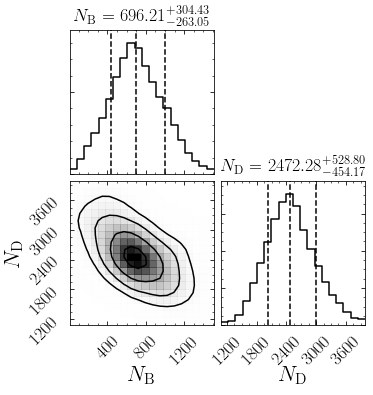

In [13]:
rs.plot_corner(labels = ['$N_\mathrm{B}$','$N_\mathrm{D}$'], chains_dir='/group/hepheno/smsharma/GCE-2FIG-bsafdi/run/chains/DiskAndBulge/')

## Float only $N_D$

In [2]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,0]

floated_params = ['N_disk']
floated_param_priors = [[0,10000]]

### Using Minuit

In [3]:
rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [4]:
rs_nd.perform_scan_minuit()

FCN = 308.555754446 
 TOTAL NCALL = 45 
 NCALLS = 45 
 
 
 EDM = 0.000147775534846 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,3502.5,545.92,0,0,0.0,10000.0,


### Using MultiNest

In [5]:
rs_nd.perform_scan_multinest(chains_dir='/group/hepheno/smsharma/GCE-2FIG-bsafdi/run/chains/DiskOnly/')

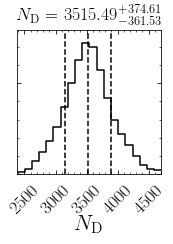

In [7]:
rs_nd.plot_corner(labels = ['$N_\mathrm{D}$'], chains_dir='/group/hepheno/smsharma/GCE-2FIG-bsafdi/run/chains/DiskOnly/')

## Float $N_D$, $N_B$ and $z_0$

In [21]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,8000],[0,10000],[0.2,1.5]]

In [19]:
rs_z0 = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [22]:
rs_z0.perform_scan_minuit()

FCN = 304.110609406 
 TOTAL NCALL = 210 
 NCALLS = 210 
 
 
 EDM = 1.20511512164e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,681.757,374.585,0,0,0.0,8000.0,
2,N_disk,2417.72,662.305,0,0,0.0,10000.0,
3,z0,0.735404,0.258869,0,0,0.2,1.5,


## Float $\beta$s together

In [27]:
fixed_params = ['n','sigma','alpha']
fixed_param_vals = [2.35,1.528,2.6]

floated_params = ['N_bulge','N_disk','z0','beta']
floated_param_priors = [[0,8000],[0,10000],[0.2,1.5],[0.2,2.0]]

In [28]:
rs_betas = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, share_betas=True)

In [29]:
rs_betas.perform_scan_minuit()

FCN = 286.080317965 
 TOTAL NCALL = 502 
 NCALLS = 502 
 
 
 EDM = 7.82582768538e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,6102.78,4920.57,0,0,0.0,8000.0,
2,N_disk,10000,1130.01,0,0,0.0,10000.0,
3,z0,0.534765,0.227395,0,0,0.2,1.5,
4,beta,1.46467,0.0498027,0,0,0.2,2.0,


## Integrate over angular bins

In [23]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [24]:
rs_angint = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 4)

In [25]:
rs_angint.perform_scan_minuit()

FCN = 303.834947829 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 1.24528603596e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,820.17,388.996,0,0,0.0,8000.0,
2,N_disk,2235.6,635.813,0,0,0.0,10000.0,


## Use a prior on the total number of sources

In [2]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [3]:
rs_prior = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, use_prior=True)

In [4]:
rs_prior.perform_scan_minuit()

FCN = 304.194413338 
 TOTAL NCALL = 82 
 NCALLS = 82 
 
 
 EDM = 8.24156363301e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,708.671,358.721,0,0,0.0,8000.0,
2,N_disk,2362.19,597.031,0,0,0.0,10000.0,
